In [1]:
from matplotlib import pyplot as plt
# %matplotlib inline
import numpy as np
import pandas as pd
import h5py
import os.path
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GRU
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, GlobalAveragePooling1D
from keras.utils import np_utils
from keras import optimizers
from keras.models import load_model

In [2]:
# 센서 1만 데이터 불러오기_ 셔플 시도
# h5 데이터는 이 파일과 같은 폴더에 있어야 함... 죄송함댜ㅎㅎ
Label_size = 32
#sensor1_data = np.empty((0,765+Label_size),int)
sensor1_data = np.empty((0,765),int)
sensor1_label = np.empty((0,Label_size),int)
position_label = np.empty((0,Label_size),int)
label_cnt = 0
sensor1_data_training = np.empty((0,765+Label_size),int)
sensor1_data_test = np.empty((0,765+Label_size),int)
print(position_label)
x = np.arange(765)
for ii in range(12346):
#for ii in range(2):
    filename ='20201022_Depth_{}.h5'.format(ii)
    
    if os.path.isfile(filename):
        h5f = h5py.File(filename,'r')
        a_dset_keys = list(h5f.keys())
        ds_data = h5f[a_dset_keys[0]]
        sensor1 = ds_data[:,0,:]    
        
        sensor1 = np.array(sensor1)
        
        #Scale down_ 10분의 1
        #sensor1 = sensor1[0::10]
        #print(sensor1[5,:].shape)
        #plt.plot(x,sensor1[5,:])
        #sensor1_scaledown = sensor1[::,::4]
        #print(sensor1_scaledown.shape)
        #plt.figure()
        #plt.plot(sensor1[5,:])
        #print("Sensor1_data:", sensor1.shape)
        #print("Scale_down_data:", scale_down_sensor1.shape)
        
        #전체 데이터 예시
        #########################################################################################################
        position_label = np.zeros((sensor1.shape[0],Label_size))
        #position_label = np.ones((sensor1.shape[0],Label_size))

        #32bit coding
        #if(ii == 0):
        #    aa = 1
        #else:
        #    position_label[:,label_cnt] = 1
        
        position_label[:,label_cnt] = 1
        print(position_label)
        label_cnt += 1
         
        sensor1_data= np.append(sensor1_data,sensor1,axis = 0)
        sensor1_label = np.append(sensor1_label,position_label,axis =0)
        
        print("{} done".format(ii))
    else:
        a = 1
        

sensor1_data.shape
sensor1_label.shape

[]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
0 done
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
1 done
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
2 done
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3 done
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
4 done
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
5 done
[[0. 0. 0. ... 0. 0

(65326, 32)

In [6]:
sc = preprocessing.StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(sensor1_data, sensor1_label, test_size=0.2, shuffle=True, stratify=sensor1_label, random_state=34)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

#CNN 모델 적용을 위한 reshape
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

print("X_train:",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",y_train.shape)
print("Y_test",y_test.shape)

X_train: (52260, 765, 1)
X_test (13066, 765, 1)
Y_train (52260, 32)
Y_test (13066, 32)


In [4]:
#KM CNN모델
#CNN모델
model_m = Sequential()
model_m.add(Conv1D(32, 5, activation='relu',input_shape=(765,1)))
model_m.add(MaxPooling1D(2))
model_m.add(Conv1D(32, 3, activation='relu'))
model_m.add(MaxPooling1D(3))
#model_m.add(Conv1D(64, 5, activation='relu'))
#model_m.add(MaxPooling1D(2))
model_m.add(Dropout(0.3))
model_m.add(Conv1D(32, 5, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Dropout(0.5))
#model_m.add(Conv1D(32, 5, activation='relu'))
#model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(32, 5, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Flatten())
model_m.add(Dense(32, activation = 'relu'))
#과대적합 발생 시, Dropout 추가
#model_m.add(Dropout(0.5))
#model_m.add(Dense(32, activation = 'relu'))
#과대적합 발생 시, Dropout 추가
model_m.add(Dropout(0.5))
model_m.add(Dense(32, activation='softmax'))
print(model_m.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 761, 32)           192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 380, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 378, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 126, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 122, 32)           5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 40, 32)            0

In [5]:
#DW_CNN모델
#CNN모델
model_m = Sequential()
model_m.add(Conv1D(4, 2, activation='relu',input_shape=(765,1)))
model_m.add(MaxPooling1D(2))
model_m.add(Conv1D(4, 2, activation='relu'))
model_m.add(MaxPooling1D(2))
model_m.add(Conv1D(4, 2, activation='relu'))
model_m.add(MaxPooling1D(2))
model_m.add(Flatten())
model_m.add(Dense(16, activation = 'relu'))
model_m.add(Dense(32, activation='softmax'))
print(model_m.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 764, 4)            12        
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 382, 4)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 381, 4)            36        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 190, 4)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 189, 4)            36        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 94, 4)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 376)              

In [5]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)]
#callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
###sgd
#sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
#model_m.compile(loss='categorical_crossentropy',
#                optimizer=sgd, metrics=['accuracy'])
adam = optimizers.Adam()
#adam = optimizers.Adam()
model_m.compile(loss='categorical_crossentropy',
                optimizer=adam, metrics=['accuracy'])

    
history = model_m.fit(X_train,
                      y_train,
                      batch_size=30,
                      epochs=50,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/50
1394/1394 [==============================] - 55s 39ms/step - loss: 4.4113 - accuracy: 0.0995 - val_loss: 3.3116 - val_accuracy: 0.0832
Epoch 2/50
1394/1394 [==============================] - 56s 40ms/step - loss: 3.0123 - accuracy: 0.1317 - val_loss: 2.6443 - val_accuracy: 0.2193
Epoch 3/50
1394/1394 [==============================] - 58s 42ms/step - loss: 2.8015 - accuracy: 0.1675 - val_loss: 2.2338 - val_accuracy: 0.3012
Epoch 4/50
1394/1394 [==============================] - 56s 40ms/step - loss: 2.5928 - accuracy: 0.2072 - val_loss: 1.9346 - val_accuracy: 0.4454
Epoch 5/50
1394/1394 [==============================] - 52s 38ms/step - loss: 2.4452 - accuracy: 0.2474 - val_loss: 1.9333 - val_accuracy: 0.4273
Epoch 6/50
1394/1394 [==============================] - 51s 37ms/step - loss: 2.3241 - accuracy: 0.2712 - val_loss: 1.6253 - val_accuracy: 0.5633
Epoch 7/50
1394/1394 [==============================] - 53s 38ms/step - loss: 2.0195 - accuracy: 0.3491 - val_loss: 1.2138 -

In [7]:
def show_results(y_test, y_pred):
    max_y_pred_test = np.argmax(y_pred, axis=1)
    max_y_test = np.argmax(y_test, axis=1)
    #show_confusion_matrix(max_y_test, max_y_pred_test)
    print(classification_report(max_y_test, max_y_pred_test))
    

In [ ]:
y_pred = model_m.predict(X_test)
show_results(y_test, y_pred)
max_y_pred_test = np.argmax(y_pred, axis=1)
max_y_test = np.argmax(y_test, axis=1)
cr = classification_report(max_y_test, max_y_pred_test)


In [24]:
a = np.argmax(y_test, axis =1)
b = np.argmax(y_pred,axis = 1)
b.shape
a.shape

(13066,)

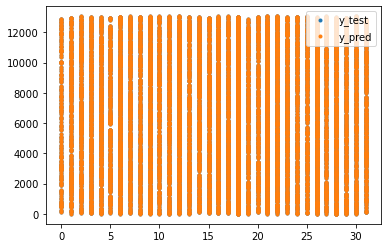

In [26]:
x = np.arange(len(a))
plt.plot(a,x,'.',label ='y_test')
plt.plot(b,x,'.', label='y_pred')
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Training(--) and validation loss')

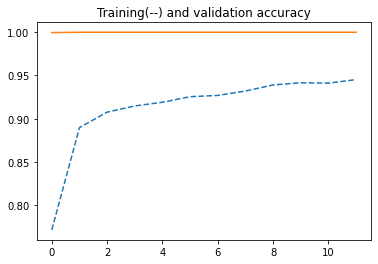

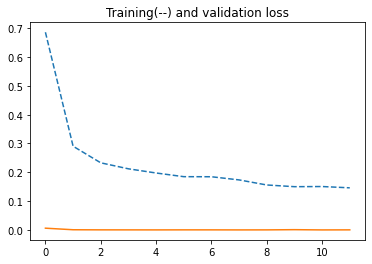

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.figure()
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

In [28]:
#CNN모델 저장
model_m.save('Radar_sensor_CNN_Model_full_5_no_scaling.h5')

In [ ]:
#CNN모델 불러오기
#model = load_model('mnist_mlp_model.h5')
